# Processor temperature

We have a temperature sensor in the processor of our company's server. We want to analyze the data provided to determinate whether we should change the cooling system for a better one. It is expensive and as a data analyst we cannot make decisions without a basis.

We provide the temperatures measured throughout the 24 hours of a day in a list-type data structure composed of 24 integers:
```
temperatures_C = [33,66,65,0,59,60,62,64,70,76,80,69,80,83,68,79,61,53,50,49,53,48,45,39]
```

## Goals

1. Treatment of lists
2. Use of loop or list comprenhention
3. Calculation of the mean, minimum and maximum.
4. Filtering of lists.
5. Interpolate an outlier.
6. Logical operators.
7. Print

## Temperature graph
To facilitate understanding, the temperature graph is shown below. You do not have to do anything in this section. The test starts in **Problem**.

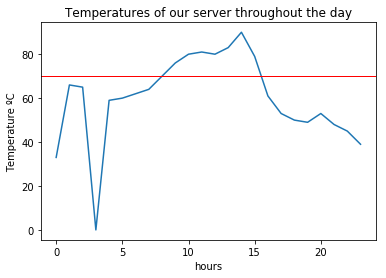

In [1]:
# import
import matplotlib.pyplot as plt
%matplotlib inline

# axis x, axis y
y = [33,66,65,0,59,60,62,64,70,76,80,81,80,83,90,79,61,53,50,49,53,48,45,39]
x = list(range(len(y)))

# plot
plt.plot(x, y)
plt.axhline(y=70, linewidth=1, color='r')
plt.xlabel('hours')
plt.ylabel('Temperature ºC')
plt.title('Temperatures of our server throughout the day')

## Problem

If the sensor detects more than 4 hours with temperatures greater than or equal to 70ºC or any temperature above 80ºC or the average exceeds 65ºC throughout the day, we must give the order to change the cooling system to avoid damaging the processor.

We will guide you step by step so you can make the decision by calculating some intermediate steps:

1. Minimum temperature
2. Maximum temperature
3. Temperatures equal to or greater than 70ºC
4. Average temperatures throughout the day.
5. If there was a sensor failure at 03:00 and we did not capture the data, how would you estimate the value that we lack? Correct that value in the list of temperatures.
6. Bonus: Our maintenance staff is from the United States and does not understand the international metric system. Pass temperatures to Degrees Fahrenheit.

Formula: F = 1.8 * C + 32

web: https://en.wikipedia.org/wiki/Conversion_of_units_of_temperature


# Solution

We assign a variable to the list of temperatures:

In [2]:
temp= y

1. Calculate the minimum of the list and print the value using print()

In [3]:
min_temp= min(temp)
print("The minimum temperature is {}ºC".format(min_temp))

The minimum temperature is 0ºC


2. Calculate the maximum of the list and print the value using print()

In [5]:
max_temp=max(temp)
print("The maximum temperature is {}ºC".format(max_temp))

The maximum temperature is 90ºC


3. Items in the list that are greater or equal than 70ºC and print the result.

For this we create a function having a list as an argument.

In [6]:
def temp_above_70(x):
    return [x[i] for i in range(len(x)) if x[i]>=70]
print("The temperatures above 70º reached are {}".format(temp_above_70(temp)))

The temperatures above 70º reached are [70, 76, 80, 81, 80, 83, 90, 79]


4. Calculate the mean temperature throughout the day and print the result.

We define a function here:

In [7]:
# x is a list
def mean(x):
    if len(x)==0:
        return(print("The list should be non-empty"))
    else:
        return(sum(x)/len(x))

print("The average temperature throughout the day was {:0.2f}ºC".format(mean(temp)))

The average temperature throughout the day was 60.25ºC


5.1 Solve the fault in the sensor by estimating a value.

A suitable estimate for the missing value is the average of the temperatures at 2:00 and 4:00:

In [8]:
est_value= mean(temp[2:5:2])

5.2 Updating the estimated value at 03:00 on the list:

In [9]:
temp[3]=est_value
print(temp)

[33, 66, 65, 62.0, 59, 60, 62, 64, 70, 76, 80, 81, 80, 83, 90, 79, 61, 53, 50, 49, 53, 48, 45, 39]


# Bonus: 
Convert the list of ºC to ºFarenheit. We define a function doing that:

In [10]:
# x is a number
def farenheit(x):
    return round(x*1.8+32, 2)

temperatures_F=[farenheit(temp[i]) for i in range(len(temp))]
print("Temperatures_F= {}".format(temperatures_F))

Temperatures_F= [91.4, 150.8, 149.0, 143.6, 138.2, 140.0, 143.6, 147.2, 158.0, 168.8, 176.0, 177.8, 176.0, 181.4, 194.0, 174.2, 141.8, 127.4, 122.0, 120.2, 127.4, 118.4, 113.0, 102.2]


## Take the decision
Remember that if the sensor detects more than 4 hours with temperatures greater than or equal to 70ºC or any temperature higher than 80ºC or the average was higher than 65ºC throughout the day, we must give the order to change the cooling system to avoid the danger of damaging the equipment:
* more than 4 hours with temperatures greater than or equal to 70ºC
* some temperature higher than 80ºC
* average was higher than 65ºC throughout the day
If any of these three is met, the cooling system must be changed.


Print True or False depending on whether you would change the cooling system or not.

We define here the function cooling( ):

In [11]:
# x is a list

def cooling(x):
    if len(temp_above_70(x))>4:
        return True
    elif max(x)>80:
        return True
    elif mean(x)>65:
        return True
    else:
        return False
    

In [12]:
cooling(temp)

True

## Future improvements
1. We want the hours (not the temperatures) whose temperature exceeds 70ºC
2. Condition that those hours are more than 4 consecutive and consecutive, not simply the sum of the whole set. Is this condition met?
3. Average of each of the lists (ºC and ºF). How they relate?
4. Standard deviation of each of the lists. How they relate?


1. We want the hours (not the temperatures) whose temperature exceeds 70ºC

Here we modify a bit the code in the question 3) of the first part. In this case we required than the temperatures are >70:


In [13]:
# x is a list
def temp_above_70_time(x):
    return [i for i in range(len(x)) if x[i]>70]

temp_times= temp_above_70_time(temp)

print("The temperatures above 70º were reached at {}".format(temp_times))

The temperatures above 70º were reached at [9, 10, 11, 12, 13, 14, 15]


2. Condition that those hours are more than 4 and consecutive, not simply the sum of the whole set. Is this condition met?

We modify the function cooling(list) given before:

In [14]:
# x is a list
def cooling_opt(x):
    y=temp_above_70_time(x)
    n=len(y)
    if n<=4:
           return False
    else:
        for i in range(n):
            if y[i+1]==y[i]+1 and y[i+2]==y[i]+2 and y[i+3]==y[i]+3:
                return True
            else:
                return False
            
cooling_opt(temp)     

True

3. Average of each of the lists (ºC and ºF). How they relate?

In [15]:
print("Average of temperatures in ºC= {:0.2f}ºC".format(mean(temp)))
print("Average of temperatures in ºF= {:0.2f}ºF".format(mean(temperatures_F)))

Average of temperatures in ºC= 62.83ºC
Average of temperatures in ºF= 145.10ºF


Note that farenheit(mean(temp))= mean(temperatures_F):

In [16]:
farenheit(mean(temp))

145.1

4. Standard deviation of each of the lists. How they relate?

First we import the module math for using the function sqrt and define two auxiary functions de_mean( ) and var( ):

In [17]:
import math

#List of diferences between each element of a list and its mean
def de_mean(x):
    return[(i-mean(x))**2 for i in x]

#variance of a list
def var(x):
    return (mean(de_mean(x)))

#Standard deviation of a list
def s_dev(x):
    return(math.sqrt(var(x)))    

print("standard deviation (ºC): {:0.2f}ºC".format(s_dev(temp)))
print("standard deviation (ºF): {:0.2f}ºC".format(s_dev(temperatures_F)))

standard deviation (ºC): 14.63ºC
standard deviation (ºF): 26.34ºC


Now we see that the standard deviation of the list in ºC in ºF is not the same as the s_dev of the list in Farenheit. The reason is that the function s_dev() is not linear!


In [18]:
print("farenheit(14.63)= {}ºF".format(farenheit(14.63)))

farenheit(14.63)= 58.33ºF
